### Задание 1
Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [61]:
import numpy as np
import math

In [9]:
for i in range (10):
    a = input()
    x = np.random.uniform(0,37)
    if x <= 35 and x <= 15:
        print('Число черное')
    elif x <= 35 and 16 <= x <= 35:
        print('Число красное')
    else:
        print('Зеро')


Число красное

Число красное

Число красное

Число черное

Число черное

Число черное

Число черное

Число черное

Зеро

Число красное


### Задание 2
1) Напишите код, проверяющий любую из теорем сложения или умножения
вероятности на примере подбрасывания монетки.

2) Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [78]:
k, m, s = 0,0,0
n = 100
l = []
for i in range (n):
    x = np.random.uniform(0,10)
    if x<5:
        #print('Орел')
        k = k + 1
        l.append('Орел')
    else:
        #print('Решка')
        m = m + 1
        l.append('Решка')
    if l[i] == l[i-1]:
        #print(l[i],l[i-1])
        s = s + 1
print(k,m,(s-1)/2)

43 57 25.0


In [80]:
#Выпадение Решки и Орла - несовместимые события, сумма вероятностей равна 1
#Теорема сложения вероятности
print(k/n + m/n == 1)
#Выпадение Решки и Орла - независимые события, вероятность выпадения два раза подряд решки или орла = 0.25 (0.5 * 0.5)
#Теорема умножения вероятности
print(round((s-1)/2/n,2) == 0.25)

True
True


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([1., 0., 2., 0., 1., 1., 1., 1., 0., 3.]),
 array([0.01441149, 0.08568696, 0.15696243, 0.2282379 , 0.29951338,
        0.37078885, 0.44206432, 0.51333979, 0.58461526, 0.65589073,
        0.7271662 ]),
 <a list of 10 Patch objects>)

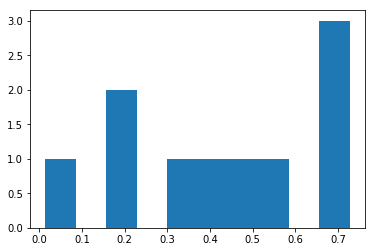

In [32]:
x = np.random.rand(10)
num_bins = 10
plt.hist(x, num_bins)
#не понял что значит "распределение случайной суммы"

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([3.78968692, 3.88968692, 3.98968692, 4.08968692, 4.18968692,
        4.28968692, 4.38968692, 4.48968692, 4.58968692, 4.68968692,
        4.78968692]),
 <a list of 10 Patch objects>)

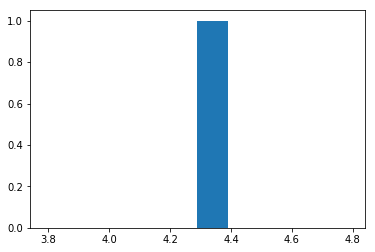

In [33]:
#врядли это
plt.hist(sum(x), num_bins)

### Задание 3
Дополните код Монте-Карло последовательности независимых испытаний
расчетом соответствующих вероятностей (через биномиальное распределение)
и сравните результаты.
Повторите расчеты, взяв другие значения n и k.

In [116]:
k, n  = 0, 50
a = np.random.randint(0,2,n)
b = np.random.randint(0,2,n)
c = np.random.randint(0,2,n)
d = np.random.randint(0,2,n)
x = a + b + c + d
for i in range (0,n):
    if x[i] == 2:
        k = k+1
print(k,n,k/n)

Coef_kn = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))
P = Coef_kn/(2**n)
print(P)
#При 10 попытках,3 успехах: по методу Монте Карло - 0.3, по формуле Бернулли - 0.1171
#При 50 попытках,27 успехах: по методу Монте Карло - 0.54, по формуле Бернулли - 0.0959

27 50 0.54
0.09596168603351884


### Задание 4

Повторите расчеты, взяв другие значения n и k.

In [121]:
import itertools

In [147]:
for p in itertools.permutations('012',3):
    print(''.join(str(x) for x in p))

012
021
102
120
201
210


In [145]:
for p in itertools.combinations('012',3):
    print(''.join(p))

012


In [144]:
for p in itertools.product('012',repeat = 3):
    print(''.join(p))

000
001
002
010
011
012
020
021
022
100
101
102
110
111
112
120
121
122
200
201
202
210
211
212
220
221
222


### Задание 5
Дополните код расчетом коэффициента корреляции x и y по формуле

0.6845028341349259 0.15439093098935663
0.6845028341349256 0.15439093098935655


C:\Users\HyperPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


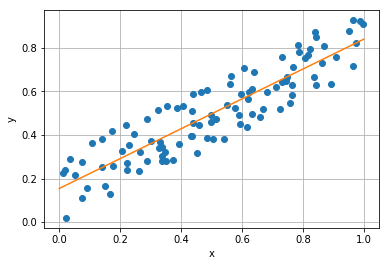

(0.9018456707707818, 0.901845670770782)

In [157]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

#Дополняем и проверяем
c = np.corrcoef(x,y)
C = np.sum( (x - np.mean(x)) * (y - np.mean(y)) ) / np.sqrt(np.sum( (x - np.mean(x))**2 ) * np.sum( (y - np.mean(y))**2 ))
c[0,1], C